# Give an overall summary of your performance from HW2 on the dataset. Do you see any areas for improvement?

After redoing my HW2, I have learned that I first need to define x and y, take out 0s, and then place all of my modeling after I have done these steps. In HW2, my code was also all over the place, so I made an effort in HW3 to only use code I need and put it in the right order. In terms of areas for improvement, my performance scores are low so I could have picked better variables to define x and y.

Logistic regression was the best model for this dataset, with 81% accuracy.

# 7. Give your conclusions on the use of k-Means and PCA on the Diabetes dataset.
These methods are great for analyzing large datasets using unsuprivised learning. However for this dataset, k-means PCA did not help all that much.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
%matplotlib inline

In [73]:
np.random.seed(7)

In [74]:
#load datsaset
names = ['preg','plasmaglu', 'bloodpressure','sknthckness', 'insulin', 'bmi', 'diabetes', 'age', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', names=names)

In [75]:
#get rid of 0s
for feature in ['plasmaglu','bloodpressure','sknthckness','insulin','bmi']:
   df.loc[:,feature].replace(to_replace=0, value=np.nan, inplace=True)
for f in ['plasmaglu','bmi','bloodpressure','insulin','sknthckness']:
  med = df[f].median()
  df[f].fillna(med, inplace=True)

In [76]:
df = df.replace({'tsf':{0:np.nan}})
df = df.dropna()

In [77]:
# Set up the train test data
from sklearn.cross_validation import train_test_split

y, X = df['class'], df.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [78]:
# impute with mean for insulin 
X_train = X_train.replace({'insulin':{0:X_train[X_train['insulin']<>0]['insulin'].mean()}})
X_test = X_test.replace({'insulin':{0:X_test[X_test['insulin']<>0]['insulin'].mean()}})

In [79]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)

X_test_std = stdsc.transform(X_test)

Run k-Means on the dataset and describe your results

,0,1
preg,2.219,5.724
plasmaglu,107.664,137.293
bloodpressure,66.787,79.152
sknthckness,26.025,32.790
insulin,118.531,168.200
bmi,30.128,35.420
diabetes,0.441,0.495
age,26.701,41.297


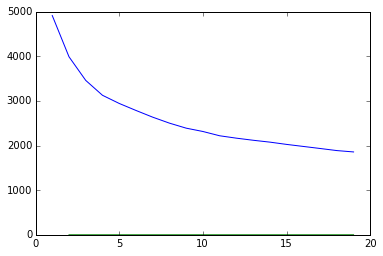

In [80]:
#kMeans

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,20):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train_std)
    x.append(n)
    y.append(km2.inertia_)
plt.plot(x, y)

from sklearn.metrics import silhouette_score
x = []
y = []
for n in range(2,20):
    km2 = KMeans(n_clusters=n)
    centers = km2.fit_predict(X_train_std)
    x.append(n)
    y.append(silhouette_score(X_train_std, centers))
plt.plot(x, y)


# get the cluster centers in the original scale
# this means you will have k cluster centers
# we pick k=2 based on silhouette score and elbow method
km = KMeans(n_clusters=2, n_init=20)
km.fit(X_train_std)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): stdsc.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=X.columns)

4. Run PCA on the dataset and describe your results

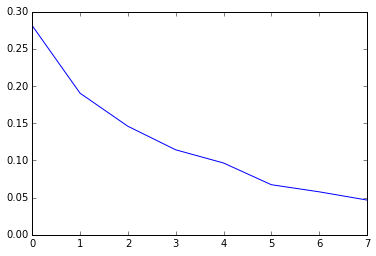

In [81]:
#PCA

from sklearn.decomposition import PCA
n_pc = X_train.shape[1]

pca = PCA(n_components=n_pc, whiten=True)
pca.fit(X_train_std)

# the first 5 components explain over 80% of the variance
pca.explained_variance_ratio_

# plot the explained variance ratio
plt.plot(range(n_pc), pca.explained_variance_ratio_)

5. Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.

In [82]:
# append the labels to a new k means dataframe
X_train_km = X_train.copy()
X_train_km['labels'] = km.labels_

# fit the test data to the clusters
X_test_km = X_test.copy()
X_test_km['labels'] = km.predict(X_test_std)

In [83]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [84]:
# standardize the new text and train
X_train_std_km = stdsc.fit_transform(X_train_km)
# transform the testing features in the same way
X_test_std_km = stdsc.transform(X_test_km)

In [85]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std_km, y_train)


from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

metrics = list(precision_recall_fscore_support(gnb.predict(X_test_std_km), y_test, average='binary'))[:3]
metrics.append(accuracy_score(gnb.predict(X_test_std_km), y_test))

In [86]:
X_train_km.corr()

,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,labels
preg,1.000,0.130,0.189,0.073,0.029,-0.007,-0.047,0.540,0.509
plasmaglu,0.130,1.000,0.224,0.168,0.421,0.252,0.123,0.285,0.489
bloodpressure,0.189,0.224,1.000,0.198,0.033,0.283,-0.008,0.319,0.514
sknthckness,0.073,0.168,0.198,1.000,0.126,0.546,0.105,0.107,0.382
insulin,0.029,0.421,0.033,0.126,1.000,0.168,0.134,0.090,0.280
bmi,-0.007,0.252,0.283,0.546,0.168,1.000,0.162,0.006,0.378
diabetes,-0.047,0.123,-0.008,0.105,0.134,0.162,1.000,0.028,0.082
age,0.540,0.285,0.319,0.107,0.090,0.006,0.028,1.000,0.607
labels,0.509,0.489,0.514,0.382,0.280,0.378,0.082,0.607,1.000


In [87]:
# Logistic Regression with ridge and lasso
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C':np.linspace(0.1,2.0,50)}
clf = GridSearchCV(logreg, parameters, cv=cv)
clf.fit(X_train_std_km, y_train)

GridSearchCV(cv=ShuffleSplit(614, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1    ,  0.13878,  0.17755,  0.21633,  0.2551 ,  0.29388,
        0.33265,  0.37143,  0.4102 ,  0.44898,  0.48776,  0.52653,
        0.56531,  0.60408,  0.64286,  0.68163,  0.72041,  0.75918,
        0.79796,  0.83673,  0.87551,  0.91429,  0.95306, ...98 ,
        1.72857,  1.76735,  1.80612,  1.8449 ,  1.88367,  1.92245,
        1.96122,  2.     ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [88]:
pd.DataFrame({'features': X_train_km.columns, 'coefs': best_logreg.coef_[0]}).sort_values(by='coefs',ascending=False)

,coefs,features
1,1.026,plasmaglu
5,0.555,bmi
0,0.282,preg
6,0.214,diabetes
7,0.159,age
3,0.000,sknthckness
8,0.000,labels
4,-0.043,insulin
2,-0.065,bloodpressure


In [89]:
clf.best_params_
best_logreg = clf.best_estimator_
print classification_report(best_logreg.predict(X_test_std_km), y_test)
scores = cross_val_score(best_logreg, X_train_std_km, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
best_logreg.score(X_test_std_km, y_test)

             precision    recall  f1-score   support

          0       0.91      0.84      0.87       116
          1       0.60      0.74      0.66        38

avg / total       0.83      0.81      0.82       154

CV score [ 0.76422764  0.78861789  0.80487805  0.76422764  0.81300813  0.73170732
  0.76422764  0.75609756  0.76422764  0.71544715], Average score 0.766666666667


0.81168831168831168

In [90]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
parameters = {'n_estimators':range(20,50,2), 'min_samples_split':range(2,10),'min_samples_leaf':range(1,3)}
clf = GridSearchCV(rf, parameters)
clf.fit(X_train_std_km, y_train)
clf.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 24}

In [91]:
best_rf = clf.best_estimator_
print classification_report(best_rf.predict(X_test_std_km), y_test)
metrics = list(precision_recall_fscore_support(best_rf.predict(X_test_std_km), y_test, average='binary'))[:3]
metrics.append(accuracy_score(best_rf.predict(X_test_std_km), y_test))

             precision    recall  f1-score   support

          0       0.89      0.86      0.87       111
          1       0.66      0.72      0.69        43

avg / total       0.82      0.82      0.82       154



In [92]:
features = X_train_km.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,plasmaglu,0.287
5,bmi,0.162
7,age,0.141
6,diabetes,0.126
4,insulin,0.085
2,bloodpressure,0.065
0,preg,0.061
3,sknthckness,0.043
8,labels,0.031


Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, with the PCA features instead of your old features. Describe your results

In [93]:
# run PCA using the top 5 features
pca = PCA(n_components=5, whiten=True)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

In [94]:
gnb.fit(X_train_std_pca, y_train)

print classification_report(gnb.predict(X_test_std_pca), y_test)
scores = cross_val_score(gnb, X_train_std_pca, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
gnb.score(X_test_std_pca, y_test)

             precision    recall  f1-score   support

          0       0.87      0.78      0.82       120
          1       0.43      0.59      0.49        34

avg / total       0.77      0.73      0.75       154

CV score [ 0.73170732  0.71544715  0.77235772  0.70731707  0.69918699  0.73170732
  0.73170732  0.73170732  0.71544715  0.7398374 ], Average score 0.727642276423


0.73376623376623373